In [413]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (835, 1113, 3)


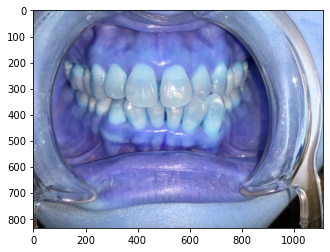

In [414]:
image = cv2.imread('teeth.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

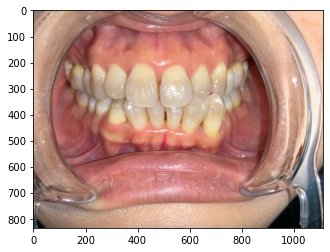

In [415]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imwrite('teeth_new.png',image)
plt.imshow(image)

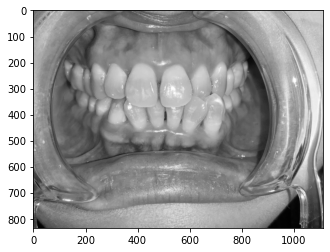

In [416]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

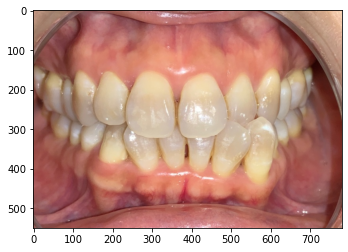

In [417]:
crop_image = image[50:600,120:900]
plt.imshow(crop_image)

In [343]:
cv2.imwrite('crop_image.png', crop_image) 

True

In [341]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [11]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [12]:
modified_image = crop_image.reshape(crop_image.shape[0]*crop_image.shape[1], 3)

In [14]:
def show_colors(number_of_colors,show_chart):
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    counts = Counter(labels)
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    return rgb_colors
    

[array([176.65957546, 114.20196569, 103.0998895 ]),
 array([110.11820797,  50.46584464,  45.91793396]),
 array([195.79460573, 166.63533669, 141.62923864]),
 array([223.46657768, 199.9093878 , 172.50110155]),
 array([148.28987051,  83.33972405,  78.95092557]),
 array([219.58712301, 137.27358793, 117.22648262])]

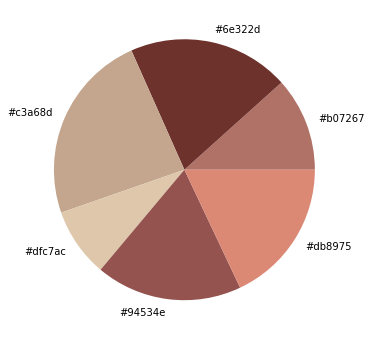

In [158]:
show_colors(6,True)

In [240]:
color_1 = (144,61,59)
color_2 = (240,219,218)

In [222]:
#color_1 = (127,54,51)
#color_2 = (230,195,194)

In [241]:
hsv_teeth = cv2.cvtColor(crop_image, cv2.COLOR_RGB2HSV)

In [242]:
mask = cv2.inRange(hsv_teeth, color_1, color_2)

In [243]:
#mask1 = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3),np.uint8))
mask1 = cv2.morphologyEx(mask1, cv2.MORPH_DILATE, np.ones((3,3),np.uint8))

In [244]:
result = cv2.bitwise_and(crop_image, crop_image, mask=mask1)

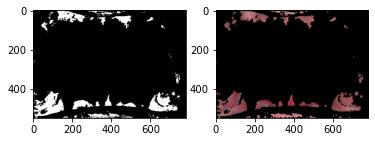

In [245]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [419]:
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2

In [420]:
gray = cv2.cvtColor(crop_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)

In [421]:
thresh = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY)[1]


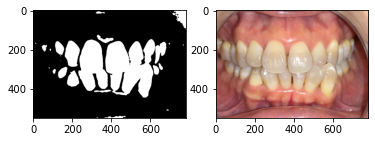

In [422]:
plt.subplot(1, 2, 1)
plt.imshow(thresh, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(crop_image)
plt.show()


In [332]:
thresh1 = cv2.erode(thresh, None, iterations=2)
thresh2 = cv2.dilate(thresh1, None, iterations=5)

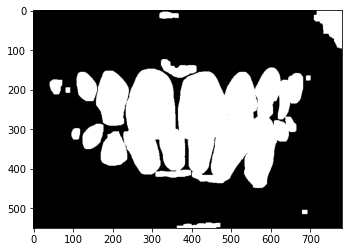

In [333]:
plt.imshow(thresh2,cmap='gray')

In [334]:
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")
# loop over the unique components
for label in np.unique(labels):
    if label == 0:
        continue
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255
    numPixels = cv2.countNonZero(labelMask)
    if numPixels <=255:
        mask = cv2.add(mask, labelMask)

C:\Users\KIIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2
  """Entry point for launching an IPython kernel.


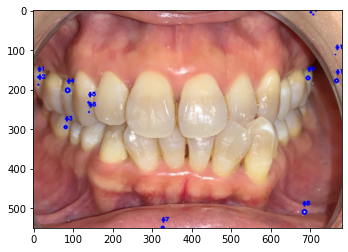

In [335]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    ((cX, cY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(crop_image, (int(cX), int(cY)), int(radius),(0, 0, 255), 3)
    cv2.putText(crop_image, "#{}".format(i + 1), (x, y - 15),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
plt.imshow(crop_image)

In [256]:
path =  r"C:\Users\KIIT\Downloads\TeethDetector-master\TeethDetector-master\cascadefina.xml"

In [257]:
teeth_classifier = cv2.CascadeClassifier(path)

In [258]:
gray_image = cv2.cvtColor(crop_image, cv2.COLOR_RGB2GRAY)

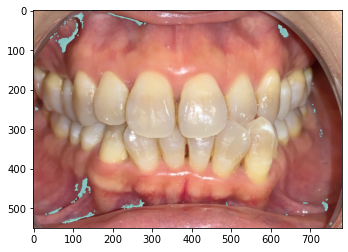

In [260]:
teeth = teeth_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=4, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE)
for (x,y,w,h) in teeth:
    cv2.rectangle(crop_image, (x,y), (x+w,y+h), (240,0,0), 2)
plt.imshow(crop_image)

In [407]:
image = cv2.imread('teeth.png')

In [408]:
crop_image = image[50:600,120:900]
img = cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB)

In [409]:
import cv2
#mport myutils

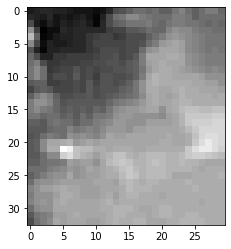

In [412]:
template = cv2.imread('search2.png',0)
plt.imshow(template,cmap='gray')

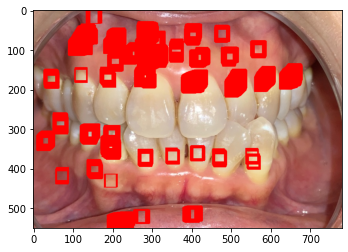

In [411]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
template = cv2.imread('search2.png',0) 
w,h  = template.shape[::-1] 
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED) 
threshold = .75
loc  = np.where(res>=threshold) 
for pt in zip(*loc[::-1]):
    #cv2.circle(image, (pt[0]+w, pt[1]+h), 1,(0, 0, 255), 3)
    cv2.rectangle(img, pt, (pt[0]+w, pt[1]+h), (255,0,0), 1) 
plt.imshow(img)  
